In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
from citipy import citipy

# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

609

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
#api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}


# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | thompson
Processing Record 2 of Set 1 | vaitape
Processing Record 3 of Set 1 | nizhniy kuranakh
Processing Record 4 of Set 1 | saint-philippe
Processing Record 5 of Set 1 | untsukul
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | kutum
Processing Record 8 of Set 1 | chokurdakh
Processing Record 9 of Set 1 | tuktoyaktuk
Processing Record 10 of Set 1 | new norfolk
Processing Record 11 of Set 1 | bakchar
Processing Record 12 of Set 1 | bluff
Processing Record 13 of Set 1 | husavik
Processing Record 14 of Set 1 | bredasdorp
Processing Record 15 of Set 1 | kruisfontein
Processing Record 16 of Set 1 | beringovskiy
Processing Record 17 of Set 1 | sungai siput utara
City not found. Skipping...
Processing Record 18 of Set 1 | butaritari
Processing Record 19 of Set 1 | busselton
Processing Record 20 of Set 1 | hami
Processing Record 21 of Set 1 | chuy
Processing Record 22 of Set 1 | t

Processing Record 37 of Set 4 | lagoa
Processing Record 38 of Set 4 | pemangkat
Processing Record 39 of Set 4 | puerto palomas
Processing Record 40 of Set 4 | vieques
Processing Record 41 of Set 4 | soubre
Processing Record 42 of Set 4 | georgetown
Processing Record 43 of Set 4 | huntsville
Processing Record 44 of Set 4 | garissa
Processing Record 45 of Set 4 | taolanaro
City not found. Skipping...
Processing Record 46 of Set 4 | ostrovnoy
Processing Record 47 of Set 4 | shenjiamen
Processing Record 48 of Set 4 | ballitoville
Processing Record 49 of Set 4 | changuinola
Processing Record 50 of Set 4 | severo-yeniseyskiy
Processing Record 1 of Set 5 | lac du bonnet
Processing Record 2 of Set 5 | newburgh
Processing Record 3 of Set 5 | minusinsk
Processing Record 4 of Set 5 | kavieng
Processing Record 5 of Set 5 | muncar
Processing Record 6 of Set 5 | milingimbi
City not found. Skipping...
Processing Record 7 of Set 5 | sitka
Processing Record 8 of Set 5 | tubmanburg
Processing Record 9 o

Processing Record 26 of Set 8 | kadykchan
City not found. Skipping...
Processing Record 27 of Set 8 | concordia
Processing Record 28 of Set 8 | sao felix do xingu
Processing Record 29 of Set 8 | seoul
Processing Record 30 of Set 8 | alofi
Processing Record 31 of Set 8 | nampa
Processing Record 32 of Set 8 | gazanjyk
Processing Record 33 of Set 8 | leh
Processing Record 34 of Set 8 | tarko-sale
Processing Record 35 of Set 8 | ruatoria
City not found. Skipping...
Processing Record 36 of Set 8 | lolua
City not found. Skipping...
Processing Record 37 of Set 8 | fort nelson
Processing Record 38 of Set 8 | yei
Processing Record 39 of Set 8 | vestmanna
Processing Record 40 of Set 8 | yen bai
Processing Record 41 of Set 8 | grenfell
Processing Record 42 of Set 8 | najran
Processing Record 43 of Set 8 | bay roberts
Processing Record 44 of Set 8 | goundam
Processing Record 45 of Set 8 | basco
Processing Record 46 of Set 8 | cocobeach
Processing Record 47 of Set 8 | dingle
Processing Record 48 of

Processing Record 13 of Set 12 | sabratah
Processing Record 14 of Set 12 | safaga
Processing Record 15 of Set 12 | gamboma
Processing Record 16 of Set 12 | fort-shevchenko
Processing Record 17 of Set 12 | kununurra
Processing Record 18 of Set 12 | marsh harbour
Processing Record 19 of Set 12 | esmeraldas
Processing Record 20 of Set 12 | tucuma
Processing Record 21 of Set 12 | evensk
Processing Record 22 of Set 12 | port macquarie
Processing Record 23 of Set 12 | tulun
Processing Record 24 of Set 12 | ulladulla
Processing Record 25 of Set 12 | benjamin constant
Processing Record 26 of Set 12 | kamenka
Processing Record 27 of Set 12 | dourados
Processing Record 28 of Set 12 | salisbury
Processing Record 29 of Set 12 | acapulco
Processing Record 30 of Set 12 | barsi
Processing Record 31 of Set 12 | vanavara
Processing Record 32 of Set 12 | yurino
Processing Record 33 of Set 12 | barre
Processing Record 34 of Set 12 | plettenberg bay
Processing Record 35 of Set 12 | northam
Processing Reco

In [11]:
len(city_data)

564

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Thompson,55.7435,-97.8558,9.36,88,100,7.61,CA,2021-11-23 18:02:54
1,Vaitape,-16.5167,-151.7500,80.06,73,97,4.07,PF,2021-11-23 18:02:54
2,Nizhniy Kuranakh,58.8353,125.4869,-6.84,96,100,3.96,RU,2021-11-23 18:02:55
3,Saint-Philippe,-21.3585,55.7679,76.59,79,55,8.23,RE,2021-11-23 18:02:55
4,Untsukul,42.7115,46.7866,45.16,49,27,6.15,RU,2021-11-23 18:02:56
5,Ushuaia,-54.8000,-68.3000,46.02,65,90,5.75,AR,2021-11-23 18:02:55
6,Kutum,14.2000,24.6667,67.66,17,11,9.64,SD,2021-11-23 18:02:47
7,Chokurdakh,70.6333,147.9167,-20.83,97,85,6.11,RU,2021-11-23 17:58:16
8,Tuktoyaktuk,69.4541,-133.0374,-5.76,96,100,4.09,CA,2021-11-23 18:02:56
9,New Norfolk,-42.7826,147.0587,59.72,73,100,2.80,AU,2021-11-23 18:01:36


In [14]:
city_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564 entries, 0 to 563
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        564 non-null    object 
 1   Lat         564 non-null    float64
 2   Lng         564 non-null    float64
 3   Max Temp    564 non-null    float64
 4   Humidity    564 non-null    int64  
 5   Cloudiness  564 non-null    int64  
 6   Wind Speed  564 non-null    float64
 7   Country     564 non-null    object 
 8   Date        564 non-null    object 
dtypes: float64(4), int64(2), object(3)
memory usage: 39.8+ KB


In [15]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Thompson,CA,2021-11-23 18:02:54,55.7435,-97.8558,9.36,88,100,7.61
1,Vaitape,PF,2021-11-23 18:02:54,-16.5167,-151.7500,80.06,73,97,4.07
2,Nizhniy Kuranakh,RU,2021-11-23 18:02:55,58.8353,125.4869,-6.84,96,100,3.96
3,Saint-Philippe,RE,2021-11-23 18:02:55,-21.3585,55.7679,76.59,79,55,8.23
4,Untsukul,RU,2021-11-23 18:02:56,42.7115,46.7866,45.16,49,27,6.15
5,Ushuaia,AR,2021-11-23 18:02:55,-54.8000,-68.3000,46.02,65,90,5.75
6,Kutum,SD,2021-11-23 18:02:47,14.2000,24.6667,67.66,17,11,9.64
7,Chokurdakh,RU,2021-11-23 17:58:16,70.6333,147.9167,-20.83,97,85,6.11
8,Tuktoyaktuk,CA,2021-11-23 18:02:56,69.4541,-133.0374,-5.76,96,100,4.09
9,New Norfolk,AU,2021-11-23 18:01:36,-42.7826,147.0587,59.72,73,100,2.80


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

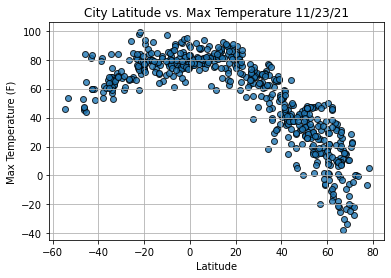

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

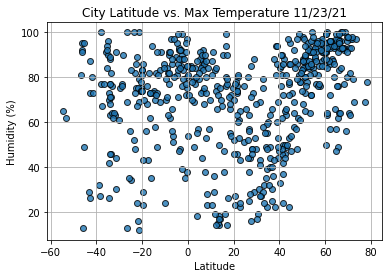

In [22]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

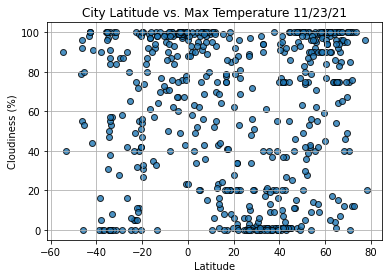

In [23]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

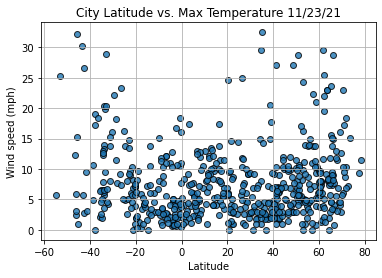

In [24]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Wind speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()